<a href="https://colab.research.google.com/github/EduHdzVillasana/Technical-Test-Torre/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Test Torre
----
*Eduardo Alan Hernandez Villasana*

## Data Extraction

The data was extracted from [Data World](https://data.world/promptcloud/50000-job-board-records-from-reed-uk).

Reed is one of the top employment agency based in the United Kingdom. This data set contains 50000 records of latest job postings on Reed UK.

This data was extracted on March 13th 2018 and contains job postings from last 15 days. Following data fields are included in the dataset:

* category
* city
* state
* company name
* job title
* job description
* job requirement
* job type
* salary offered
* posting date

**IMPORTANT**: The Node4j sandbox used in this notebook will be available until May 30th 2021. 

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_url = "https://query.data.world/s/rut5pr5nm5i4onzlfp6xjgcsw3rvu4"
df_raw = pd.read_csv(data_url)

## Data Exploration

In [ ]:
df_raw.sample(5)

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
9574,social care jobs,Maidenhead,Vantis Resourcing,uk,reed,Apply now Our client is a new Private homecar...,NaN,Domicilary Care Assistants,"Permanent, part-time",3/12/2018,£11.00 - £14.00 per hour,Berkshire
16778,sales jobs,South East England,Aaron Wallis Sales Recruitment,uk,reed,Apply now Position: Business Development Exec...,Required skills Field Sales Sales account man...,Field Sales Executive,"Permanent, full-time",3/8/2018,"£20,000 - £22,000 per annum",England
29095,motoring automotive jobs,Bedford,Kwik-Fit,uk,reed,Apply on employer's website Our Tyre & Auto-C...,NaN,Advanced Autocare Technician,"Permanent, full-time",3/10/2018,"£15,300 - £18,300 per annum",Bedfordshire
16031,accountancy jobs,East London,Oakleaf Partnership,uk,reed,Apply now Payroll Officer - Â£35000 to Â£4000...,Required skills Banking City Financial Servic...,Payroll Officer Â£35k to Â£40k + Bens - City,"Permanent, full-time",3/7/2018,"£35,000 - £40,000 per annum",London
18539,education jobs,Nottingham,Monarch Education,uk,reed,Apply now Monarch Education is a highly estab...,NaN,Newly Qualified Teachers NQT's,"Contract, part-time",3/8/2018,£90.00 - £110.00 per day,Nottinghamshire


In [ ]:
df_raw.dtypes

category            object
city                object
company_name        object
geo                 object
job_board           object
job_description     object
job_requirements    object
job_title           object
job_type            object
post_date           object
salary_offered      object
state               object
dtype: object

In [ ]:
df_raw.isnull().sum()

category                0
city                    0
company_name            0
geo                     0
job_board               0
job_description         0
job_requirements    29452
job_title               0
job_type                0
post_date               0
salary_offered          0
state                  20
dtype: int64

In [ ]:
df_raw.shape

(50000, 12)

In [ ]:
df_raw.describe()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,20548,50000,50000,50000,50000,49980
unique,37,2918,5166,1,1,42057,14887,29155,9,66,7345,167
top,health jobs,London,Hays Specialist Recruitment Limited,uk,reed,Apply on employer's website Add an annual tur...,Required skills Recruitment,Administrator,"Permanent, full-time",3/7/2018,Salary negotiable,London
freq,1930,4349,1830,50000,50000,85,123,162,36864,8472,4539,5900


In [ ]:
df_raw["city"].sort_values().unique()[[937,1012]]

array(['FRANKFURT', 'Frankfurt'], dtype=object)

In [ ]:
df_raw["job_type"].unique()

array(['Permanent, full-time', 'Permanent, full-time or part-time',
       'Permanent, part-time', 'Contract, full-time',
       'Temporary, part-time', 'Temporary, full-time or part-time',
       'Temporary, full-time', 'Contract, full-time or part-time',
       'Contract, part-time'], dtype=object)

## Data Cleaning
* The `geo` and `job_board` columns will be dropped because they have only one unique value in all rows.
* Transform to lower case the cities and states because some cities or states are repeated but some with uper case or lower case.
* Get kew words in `job_requirements` to get a list of requirements.

### Dropping unnecessary columns

In [ ]:
df = df_raw.drop(columns = ["geo","job_board"], axis = 1)

### Transforming string columns to lower case.

In [ ]:
df["city"] = df["city"].str.lower()
df["state"] = df["state"].str.lower()
df["job_requirements"] = df["job_requirements"].str.lower()
df["job_title"] = df["job_title"].str.lower()
df["company_name"] = df["company_name"].str.lower()
df["category"] = df["category"].str.lower()

In [ ]:
len(df[df["salary_offered"] == " Salary not specified "])

317

In [ ]:
df["salary_offered"] = df["salary_offered"].str.strip()

In [ ]:
len(df[df["salary_offered"] == "Salary not specified"])

317

### Getting key words of `job_requirements` 

In [ ]:
df["job_requirements"].sample(3)

14729                                                  NaN
20150     required skills defence microsoft office secu...
6906                     required skills customer service 
Name: job_requirements, dtype: object

"required skills* is repeated in all non NaN rows

In [ ]:
df["job_requirements"] = df["job_requirements"].str.replace("required skills ","")

In [ ]:
df["job_requirements"].sample(5)

18556    NaN
45039    NaN
38570    NaN
2455     NaN
33515    NaN
Name: job_requirements, dtype: object

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["job_requirements"] = df["job_requirements"].fillna("Unrequirement")

In [ ]:
df["job_requirements"].sample(5)

11822                                        Unrequirement
28848                                        Unrequirement
43488     assistive technologist / student learning sup...
5698                                         Unrequirement
36463     new finance business partner / project accoun...
Name: job_requirements, dtype: object

In [ ]:
df["job_requirements"] = df["job_requirements"].str.lower()
df["job_requirements"] = df["job_requirements"].str.strip()
df["job_requirements"] = df["job_requirements"].str.replace('[^\w\s]', '')
df["job_requirements"] = df["job_requirements"].str.replace('\d', '')
df["job_requirements"] = df["job_requirements"].str.replace('\\n', '')

In [ ]:
df["job_requirements"] = df["job_requirements"].apply(nltk.word_tokenize)

In [ ]:
df["job_requirements"].sample(3)

7258                                       [unrequirement]
29285    [administrator, administration, sales, adminis...
21608     [category, leadership, management, team, leader]
Name: job_requirements, dtype: object

In [ ]:
english_stop_words = stopwords.words('english')
df["job_requirements"] = df["job_requirements"].apply(lambda s: [word for word in s if word not in english_stop_words])

In [ ]:
df["job_requirements"].sample(10)

8429                                       [unrequirement]
37474    [recruitment, sales, sales, recruitment, train...
35916                                      [unrequirement]
27362                                      [unrequirement]
45084    [computer, literate, order, processing, repeti...
25793    [estate, agents, lettings, property, managemen...
6122                                     [dutch, research]
30976                                      [unrequirement]
4608                                       [unrequirement]
30215    [computer, literate, warehouse, forklift, oper...
Name: job_requirements, dtype: object

In [ ]:
df["id"] = df.index

In [ ]:
df.describe(include="object")

,category,city,company_name,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,49980
unique,37,2874,5162,42057,14786,28702,9,66,7345,163
top,health jobs,london,hays specialist recruitment limited,Apply on employer's website Add an annual tur...,[unrequirement],administrator,"Permanent, full-time",3/7/2018,Salary negotiable,london
freq,1930,4349,1830,85,29452,162,36864,8472,4539,5900


In [ ]:
df.head(3)

,category,city,company_name,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state,id
0,catering jobs,chudleigh,haulfryn group,Apply now New opportunity not to be missed! H...,[unrequirement],commis chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",devon,0
1,law jobs,swindon,reed,Apply now This role requires an experienced s...,[unrequirement],corporate legal secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",wiltshire,1
2,factory jobs,norfolk,swanstaff recruitment ltd,Apply now Job Title: Warehouse personLocation...,[unrequirement],warehouse person,"Permanent, full-time",2/27/2018,Salary not specified,east anglia,2


In [ ]:
df_cleaned = df.copy()

## Preparing DataFrame for the Graph Database

In [ ]:
df_cleaned.columns

Index(['category', 'city', 'company_name', 'job_description',
       'job_requirements', 'job_title', 'job_type', 'post_date',
       'salary_offered', 'state', 'id'],
      dtype='object')

In [ ]:
df_celaned = df_cleaned.rename(columns = {"company_name":"company","job_description":"description","job_requirements":"requirements", "job_title":"title","job_type":"type","salary_offered":"salary"})

In [ ]:
df_celaned.columns

Index(['category', 'city', 'company', 'description', 'requirements', 'title',
       'type', 'post_date', 'salary', 'state', 'id'],
      dtype='object')

### Preparing `category` nodes

In [ ]:
category = pd.DataFrame(df_celaned[["category"]]).explode("category").drop_duplicates(subset=["category"])
category.size

37

### Preparing `city` nodes

In [ ]:
city = pd.DataFrame(df_celaned[["city"]]).explode("city").drop_duplicates(subset=["city"])
city.size

2874

### Preparing `company` nodes

In [ ]:
company = pd.DataFrame(df_celaned[["company"]]).explode("company").drop_duplicates(subset=["company"])
company.size

5162

### Preparing `requirement` nodes

In [ ]:
requirements = pd.DataFrame(df_celaned[["requirements"]]).explode("requirements").drop_duplicates(subset=["requirements"])
requirements.size

7761

In [ ]:
requirements.isna().sum()

requirements    1
dtype: int64

In [ ]:
requirements = requirements.dropna()

In [ ]:
requirements.size

7760

### Preparing `title` nodes

In [ ]:
title = pd.DataFrame(df_celaned[["title"]]).explode("title").drop_duplicates(subset=["title"])
title.size

28702

### Preparing `type` nodes

In [ ]:
type_ = pd.DataFrame(df_celaned[["type"]]).explode("type").drop_duplicates(subset=["type"])
type_.size

9

### Preparing `state` nodes

In [ ]:
state = pd.DataFrame(df_celaned[["state"]]).explode("state").drop_duplicates(subset=["state"])
state.size

164

### Preparing `salary` nodes

In [ ]:
salary = pd.DataFrame(df_celaned[["salary"]]).explode("salary").drop_duplicates(subset=["salary"])
salary.size

7345

### Preparing `job` nodes

In [ ]:
job = df_celaned[["id","description","post_date"]]

## Neo4j Databese

In [ ]:
!pip install neo4j
!pip install tqdm

     |████████████████████████████████| 71kB 4.9MB/s 
  Created wheel for neo4j: filename=neo4j-4.2.1-cp37-none-any.whl size=95190 sha256=8f1005e11fe305570641ba2664afd395ef221499d429de337685a9e5030507fb
  Stored in directory: /root/.cache/pip/wheels/00/a8/69/083e04c2ffc0a7e026c9356cd5bb54c65128f3e08ef8371be0
Successfully built neo4j


In [ ]:
from tqdm import tqdm
import neo4j
from neo4j import GraphDatabase

### Connection class and data add functions

In [ ]:
class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, parameters=None, db=None):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response

In [ ]:
def insert_data(query, rows, batch_size = 1000):
    # Function to handle the updating the Neo4j database in batch mode.
    import time
    total = 0
    batch = 0
    start = time.time()
    result = None

    while batch * batch_size < len(rows):

        res = conn.query(query, parameters={'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')})
        #total += res[0]['total']
        batch += 1
        result = {"total":total, "batches":batch, "time":time.time()-start}
        print(result)

    return result

In [ ]:
def add_category(category):
    # Adds category nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:Category {category: row.category})
            RETURN count(*) as total
            '''
    return conn.query(query, parameters = {'rows':category.to_dict('records')})

In [ ]:
def add_city(city):
    # Adds city nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:City {city: row.city})
            RETURN count(*) as total
            '''
    return conn.query(query, parameters = {'rows':city.to_dict('records')})

In [ ]:
def add_company(company):
    # Adds company nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:Company {company: row.company})
            RETURN count(*) as total
            '''
    return conn.query(query, parameters = {'rows':company.to_dict('records')})

In [ ]:
def add_requirements(rows, batch_size=1000):
    # Adds requirements nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:Requirement {requirement: row.requirements})
            RETURN count(*) as total
            '''
    return insert_data(query, rows, batch_size)

In [ ]:
def add_title(rows, batch_size=1000):
    # Adds title nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:Title {title: row.title})
            RETURN count(*) as total
            '''
    return insert_data(query, rows, batch_size)

In [ ]:
def add_type(type_):
    # Adds type nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:Type {type: row.type})
            RETURN count(*) as total
            '''
    return conn.query(query, parameters = {'rows':type_.to_dict('records')})

In [ ]:
def add_state(state):
    # Adds state nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:State {state: row.state})
            RETURN count(*) as total
            '''
    return conn.query(query, parameters = {'rows':state.to_dict('records')})

In [ ]:
def add_salary(rows, batch_size=1000):
    # Adds salary nodes to the Neo4j graph.
    query = '''
            UNWIND $rows AS row
            MERGE (c:Salary {salary: row.salary})
            RETURN count(*) as total
            '''
    return insert_data(query, rows, batch_size)

In [ ]:
def add_jobs(rows, batch_size=1000):
 
   query = '''
   UNWIND $rows as row
   MERGE (j:Job {id:row.id}) ON CREATE SET j.description = row.description, j.post_date = row.post_date
   
   // connect categories
   WITH row, j
   UNWIND row.category AS category_value
   MATCH (c:Category {category: category_value})
   MERGE (j)-[:IN_CATEGORY]->(c)

   // connect cities
   WITH row, j
   UNWIND row.city AS city_value
   MATCH (d:City {city: city_value})
   MERGE (j)-[:IN_CITY]->(d)

   // connect companies
   WITH row, j
   UNWIND row.company AS company_value
   MATCH (e:Company {company: company_value})
   MERGE (j)-[:IN_COMPANY]->(e)

   // connect requirements
   WITH row, j
   UNWIND row.requirements AS requirement_value
   MATCH (r:Requirement {requirement: requirement_value})
   MERGE (j)-[:ASK_REQUIREMENT]->(r)

   // connect titles
   WITH row, j
   UNWIND row.title AS title_value
   MATCH (t:Title {title: title_value})
   MERGE (j)-[:NAMED_TITLE]->(t)

   // connect types
   WITH row, j
   UNWIND row.type AS type_value
   MATCH (u:Type {type: type_value})
   MERGE (j)-[:IS_TYPE]->(u)

   // connect states
   WITH row, j
   UNWIND row.state AS state_value
   MATCH (s:State {state: state_value})
   MERGE (j)-[:IN_STATE]->(s)

   // connect salaries
   WITH row, j
   UNWIND row.salary AS salary_value
   MATCH (z:Salary {salary: salary_value})
   MERGE (j)-[:OFFER_SALARY]->(z)
   '''
 
   return insert_data(query, rows, batch_size)

### Connection  to Neo4j

In [ ]:
conn = Neo4jConnection(uri="bolt://18.213.220.99:7687", 
                       user="neo4j",              
                       pwd="airs-concentrations-atom")
neo4j.unit_of_work(timeout=720000)

<function neo4j.work.simple.unit_of_work.<locals>.wrapper>

**Creation of Nodes**

In [ ]:
conn.query('CREATE CONSTRAINT jobs IF NOT EXISTS ON (j:Job) ASSERT j.id IS UNIQUE')
conn.query('CREATE CONSTRAINT category IF NOT EXISTS ON (c:Category) ASSERT c.category IS UNIQUE')
conn.query('CREATE CONSTRAINT city IF NOT EXISTS ON (d:City) ASSERT d.city IS UNIQUE')
conn.query('CREATE CONSTRAINT company IF NOT EXISTS ON (e:Company) ASSERT e.company IS UNIQUE')
conn.query('CREATE CONSTRAINT requirement IF NOT EXISTS ON (r:Requirement) ASSERT r.requirement IS UNIQUE')
conn.query('CREATE CONSTRAINT title IF NOT EXISTS ON (t:Title) ASSERT t.title IS UNIQUE')
conn.query('CREATE CONSTRAINT type IF NOT EXISTS ON (u:Type) ASSERT u.title IS UNIQUE')
conn.query('CREATE CONSTRAINT state IF NOT EXISTS ON (s:State) ASSERT s.state IS UNIQUE')
conn.query('CREATE CONSTRAINT salary IF NOT EXISTS ON (z:Salary) ASSERT z.salary IS UNIQUE')

[]

### Database Population

Dont run because the database has already been populated.

In [ ]:
add_category(category)

[<Record total=37>]

In [ ]:
add_city(city)

[<Record total=2874>]

In [ ]:
add_company(company)

[<Record total=5162>]

In [ ]:
add_title(title)

{'total': 0, 'batches': 1, 'time': 3.886063575744629}
{'total': 0, 'batches': 2, 'time': 7.391524076461792}
{'total': 0, 'batches': 3, 'time': 9.59232473373413}
{'total': 0, 'batches': 4, 'time': 11.789734840393066}
{'total': 0, 'batches': 5, 'time': 13.994056940078735}
{'total': 0, 'batches': 6, 'time': 15.886851787567139}
{'total': 0, 'batches': 7, 'time': 17.58951735496521}
{'total': 0, 'batches': 8, 'time': 19.385392427444458}
{'total': 0, 'batches': 9, 'time': 20.989448308944702}
{'total': 0, 'batches': 10, 'time': 22.487468719482422}
{'total': 0, 'batches': 11, 'time': 24.585427045822144}
{'total': 0, 'batches': 12, 'time': 25.986669301986694}
{'total': 0, 'batches': 13, 'time': 27.285462141036987}
{'total': 0, 'batches': 14, 'time': 28.5943124294281}
{'total': 0, 'batches': 15, 'time': 29.985620498657227}
{'total': 0, 'batches': 16, 'time': 30.988242864608765}
{'total': 0, 'batches': 17, 'time': 31.987191915512085}
{'total': 0, 'batches': 18, 'time': 32.89482069015503}
{'total':

{'batches': 29, 'time': 43.5854697227478, 'total': 0}

In [ ]:
add_type(type_)

[<Record total=9>]

In [ ]:
add_state(state)

[<Record total=164>]

In [ ]:
add_requirements(requirements)

{'total': 0, 'batches': 1, 'time': 1.8904178142547607}
{'total': 0, 'batches': 2, 'time': 3.8913767337799072}
{'total': 0, 'batches': 3, 'time': 5.68384051322937}
{'total': 0, 'batches': 4, 'time': 7.48760461807251}
{'total': 0, 'batches': 5, 'time': 8.293277978897095}
{'total': 0, 'batches': 6, 'time': 9.083996534347534}
{'total': 0, 'batches': 7, 'time': 9.790867567062378}
{'total': 0, 'batches': 8, 'time': 10.483748197555542}


{'batches': 8, 'time': 10.483748197555542, 'total': 0}

In [ ]:
add_salary(salary)

{'total': 0, 'batches': 1, 'time': 1.7745952606201172}
{'total': 0, 'batches': 2, 'time': 2.575186252593994}
{'total': 0, 'batches': 3, 'time': 3.3746213912963867}
{'total': 0, 'batches': 4, 'time': 3.9797022342681885}
{'total': 0, 'batches': 5, 'time': 4.477698802947998}
{'total': 0, 'batches': 6, 'time': 4.789241790771484}
{'total': 0, 'batches': 7, 'time': 5.074818134307861}
{'total': 0, 'batches': 8, 'time': 5.183115005493164}


{'batches': 8, 'time': 5.183115005493164, 'total': 0}

In [ ]:
df_celaned.head(2)

,category,city,company,description,requirements,title,type,post_date,salary,state,id
0,catering jobs,chudleigh,haulfryn group,Apply now New opportunity not to be missed! H...,[unrequirement],commis chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",devon,0
1,law jobs,swindon,reed,Apply now This role requires an experienced s...,[unrequirement],corporate legal secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",wiltshire,1


In [ ]:
add_jobs(df_celaned)

{'total': 0, 'batches': 1, 'time': 53.768173694610596}
{'total': 0, 'batches': 2, 'time': 91.06008124351501}
{'total': 0, 'batches': 3, 'time': 115.26552748680115}
{'total': 0, 'batches': 4, 'time': 122.2616696357727}
{'total': 0, 'batches': 5, 'time': 125.9559223651886}
{'total': 0, 'batches': 6, 'time': 131.9563126564026}
{'total': 0, 'batches': 7, 'time': 135.15643072128296}
{'total': 0, 'batches': 8, 'time': 138.0673267841339}
{'total': 0, 'batches': 9, 'time': 141.36027312278748}
{'total': 0, 'batches': 10, 'time': 145.95590806007385}
{'total': 0, 'batches': 11, 'time': 149.35742688179016}
{'total': 0, 'batches': 12, 'time': 154.25685501098633}
{'total': 0, 'batches': 13, 'time': 158.7582688331604}
{'total': 0, 'batches': 14, 'time': 163.780353307724}
{'total': 0, 'batches': 15, 'time': 167.76018619537354}
{'total': 0, 'batches': 16, 'time': 170.76652884483337}
{'total': 0, 'batches': 17, 'time': 174.7559196949005}
{'total': 0, 'batches': 18, 'time': 177.47639060020447}
{'total': 

{'batches': 50, 'time': 309.8576600551605, 'total': 0}

## Data Insights

MATCH (c:City) 
RETURN c.city, SIZE(()-[:IN_CITY]->(c)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20

MATCH (c:Category) 
RETURN c.category, SIZE(()-[:IN_CATEGORY]->(c)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20

MATCH (c:Company) 
RETURN c.company, SIZE(()-[:IN_COMPANY]->(c)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20

MATCH (t:Title) 
RETURN t.title, SIZE(()-[:NAMED_TITLE]->(t)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20

MATCH (n:Job) RETURN n.post_date LIMIT 25

MATCH (s:Salary) 
RETURN s.salary, SIZE(()-[:OFFER_SALARY]->(s)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20

### Top 20 Cities with more Jobs

In [ ]:
query_string = '''
MATCH (c:City) 
RETURN c.city, SIZE(()-[:IN_CITY]->(c)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20
'''
top_cities_df = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
top_cities_df.head(20)

,c.city,inDegree
0,london,4349
1,city of london,1630
2,manchester,1283
3,central london,997
4,birmingham,931
5,bristol,881
6,leeds,877
7,west london,636
8,south west london,493
9,reading,483


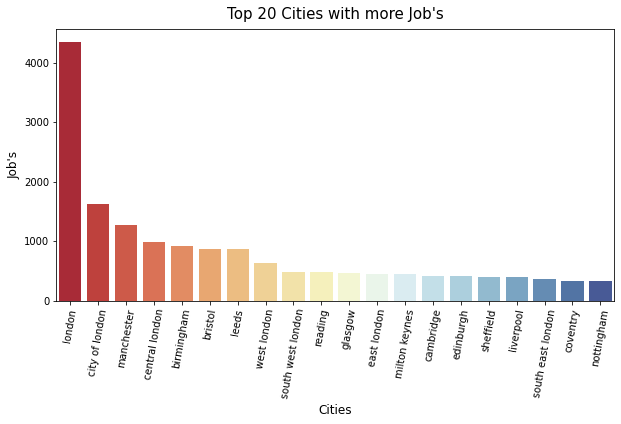

In [ ]:
# Top 20 cities barplot
fig = plt.figure(figsize=(10,5  ))
ax = fig.add_subplot()

sns.barplot(x = top_cities_df["c.city"], y = top_cities_df["inDegree"], ax=ax, palette='RdYlBu');
ax.set_title("Top 20 Cities with more Job's", pad=10, size = 15)
ax.set_ylabel("Job's", size = 12)
ax.set_xlabel("Cities", size = 12)
ax.tick_params(axis='x', rotation=80)

### Top 20 Categories with more Jobs

In [ ]:
query_string = '''
MATCH (c:Category) 
RETURN c.category, SIZE(()-[:IN_CATEGORY]->(c)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20
'''
top_categories_df = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
top_categories_df.head(20)

,c.category,inDegree
0,health jobs,1930
1,education jobs,1898
2,it jobs,1890
3,logistics jobs,1885
4,construction property jobs,1859
5,engineering jobs,1858
6,accountancy jobs,1856
7,sales jobs,1855
8,accountancy qualified jobs,1836
9,social care jobs,1823


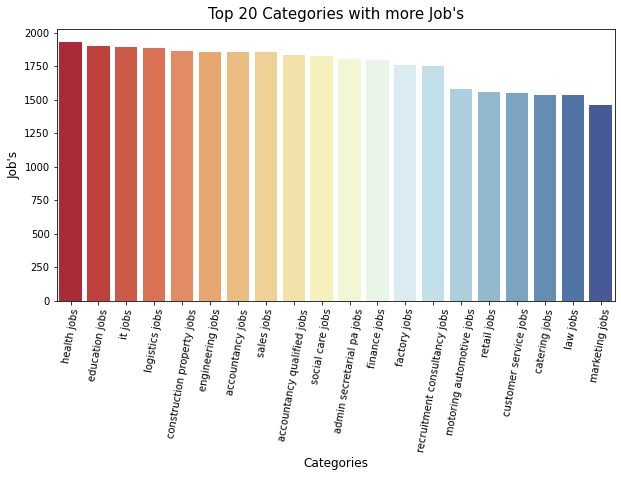

In [ ]:
# Top 20 categories barplot
fig = plt.figure(figsize=(10,5  ))
ax = fig.add_subplot()

sns.barplot(x = top_categories_df["c.category"], y = top_categories_df["inDegree"], ax=ax, palette='RdYlBu');
ax.set_title("Top 20 Categories with more Job's", pad=10, size = 15)
ax.set_ylabel("Job's", size = 12)
ax.set_xlabel("Categories", size = 12)
ax.tick_params(axis='x', rotation=80)

### Top 20 Companies with more Jobs

In [ ]:
query_string = '''
MATCH (c:Company) 
RETURN c.company, SIZE(()-[:IN_COMPANY]->(c)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20
'''
top_companies_df = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
top_companies_df.head(20)

,c.company,inDegree
0,hays specialist recruitment limited,1830
1,reed,804
2,search consultancy,534
3,pareto,450
4,adecco uk limited,355
5,sw6 associates ltd,302
6,"randstad construction, property and engineering",287
7,rise technical recruitment limited,280
8,interaction recruitment,267
9,reed accountancy,266


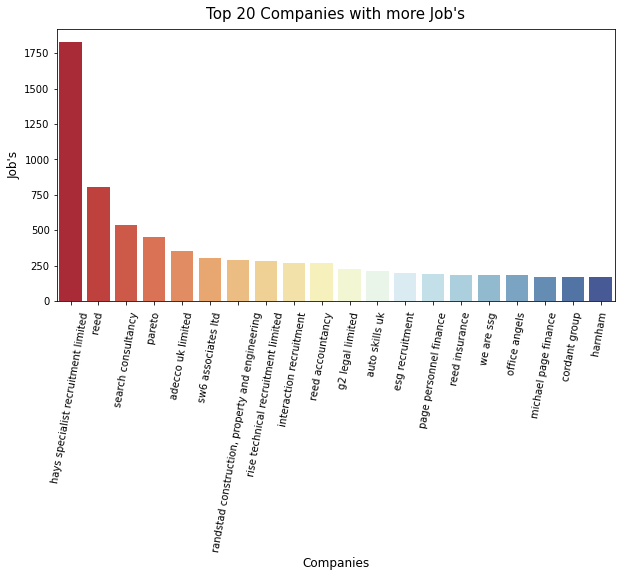

In [ ]:
# Top 20 companies barplot
fig = plt.figure(figsize=(10,5  ))
ax = fig.add_subplot()

sns.barplot(x = top_companies_df["c.company"], y = top_companies_df["inDegree"], ax=ax, palette='RdYlBu');
ax.set_title("Top 20 Companies with more Job's", pad=10, size = 15)
ax.set_ylabel("Job's", size = 12)
ax.set_xlabel("Companies", size = 12)
ax.tick_params(axis='x', rotation=80)

### Top 20 Job Titles more popular

In [ ]:
query_string = '''
MATCH (t:Title) 
RETURN t.title, SIZE(()-[:NAMED_TITLE]->(t)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20
'''
top_titles_df = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
top_titles_df.head(20)

,t.title,inDegree
0,administrator,162
1,customer service advisor,150
2,management accountant,144
3,warehouse operative,140
4,recruitment consultant,127
5,buyer,116
6,care assistant,116
7,account manager,113
8,support worker,112
9,vehicle technician,110


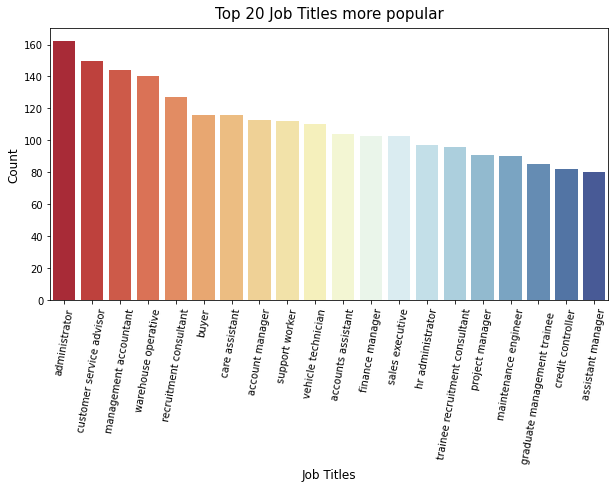

In [ ]:
# Top 20 titles barplot
fig = plt.figure(figsize=(10,5  ))
ax = fig.add_subplot()

sns.barplot(x = top_titles_df["t.title"], y = top_titles_df["inDegree"], ax=ax, palette='RdYlBu');
ax.set_title("Top 20 Job Titles more popular", pad=10, size = 15)
ax.set_ylabel("Count", size = 12)
ax.set_xlabel("Job Titles", size = 12)
ax.tick_params(axis='x', rotation=80)

### Top 20 Salary Offers

In [ ]:
query_string = '''
MATCH (s:Salary) 
RETURN s.salary, SIZE(()-[:OFFER_SALARY]->(s)) AS inDegree 
ORDER BY inDegree DESC LIMIT 20
'''
top_salaries_df = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
top_salaries_df.head(20)

,s.salary,inDegree
0,Salary negotiable,4538
1,Competitive salary,3997
2,"£30,000 - £35,000 per annum",633
3,"£25,000 - £30,000 per annum",569
4,"£35,000 - £40,000 per annum",488
5,"£20,000 - £25,000 per annum",487
6,£7.50 per hour,477
7,"£30,000 - £40,000 per annum",468
8,"£40,000 - £45,000 per annum",386
9,"£18,000 - £20,000 per annum",371


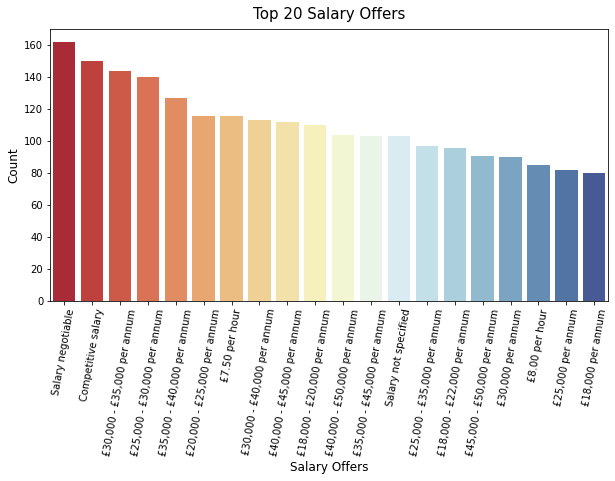

In [ ]:
# Top 20 salaries barplot
fig = plt.figure(figsize=(10,5  ))
ax = fig.add_subplot()

sns.barplot(x = top_salaries_df["s.salary"], y = top_titles_df["inDegree"], ax=ax, palette='RdYlBu');
ax.set_title("Top 20 Salary Offers", pad=10, size = 15)
ax.set_ylabel("Count", size = 12)
ax.set_xlabel("Salary Offers", size = 12)
ax.tick_params(axis='x', rotation=80)

### Jobs Posted Per Day

In [ ]:
query_string = '''
MATCH (n:Job) RETURN n.post_date
'''
jobs = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
jobs["count"] = 1
jobs.head(5)

,n.post_date,count
0,3/12/2018,1
1,3/8/2018,1
2,2/27/2018,1
3,2/21/2018,1
4,3/1/2018,1


In [ ]:
jobs["n.post_date"] = pd.to_datetime(jobs["n.post_date"])
jobs.dtypes

n.post_date    datetime64[ns]
count                   int64
dtype: object

In [ ]:
jobs.head()

,n.post_date,count
0,2018-03-12,1
1,2018-03-08,1
2,2018-02-27,1
3,2018-02-21,1
4,2018-03-01,1


In [ ]:
jobs_by_day = jobs.groupby("n.post_date")["count"].sum()
jobs_by_day = pd.DataFrame({"date":jobs_by_day.index, "count":jobs_by_day.values})
jobs_by_day

,date,count
0,2017-08-31,1
1,2017-09-21,1
2,2017-11-30,1
3,2017-12-18,1
4,2017-12-21,1
...,...,...
61,2018-03-09,2215
62,2018-03-10,270
63,2018-03-11,616
64,2018-03-12,7503


In [ ]:
jobs_by_day.dtypes

date     datetime64[ns]
count             int64
dtype: object

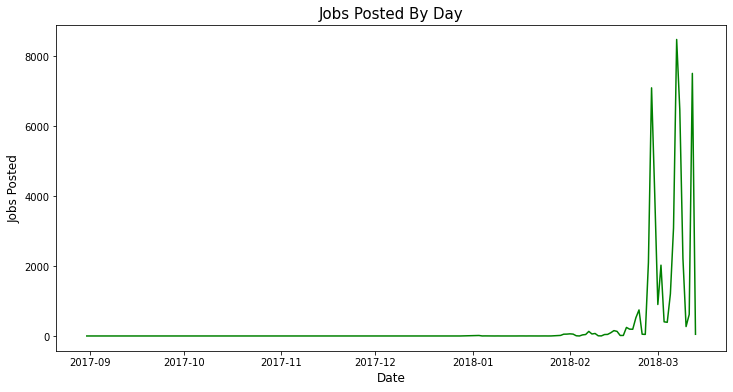

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=jobs_by_day["date"], y=jobs_by_day["count"], color = "green")

ax.set_title('Jobs Posted By Day', size = 15)
ax.set_ylabel("Jobs Posted", size = 12)
ax.set_xlabel("Date", size = 12);